In [814]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as  em
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from IPython.display import display
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


problem :
    
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

Please do perform the following questions on each of these two data sets separately.


1. Read the data as an appropriate Time Series data and plot the data.

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

3. Split the data into training and test. The test data should start in 1991.

4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

# Problem 2  : Rose.csv


##  Read the data as an appropriate Time Series data and plot the data.

In [815]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [816]:
df.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [817]:
date = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [818]:
df['Time_Stamp'] = date
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [819]:
df.tail()

,YearMonth,Rose,Time_Stamp
182,1995-03,45.0,1995-03-31
183,1995-04,52.0,1995-04-30
184,1995-05,28.0,1995-05-31
185,1995-06,40.0,1995-06-30
186,1995-07,62.0,1995-07-31


In [820]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [821]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

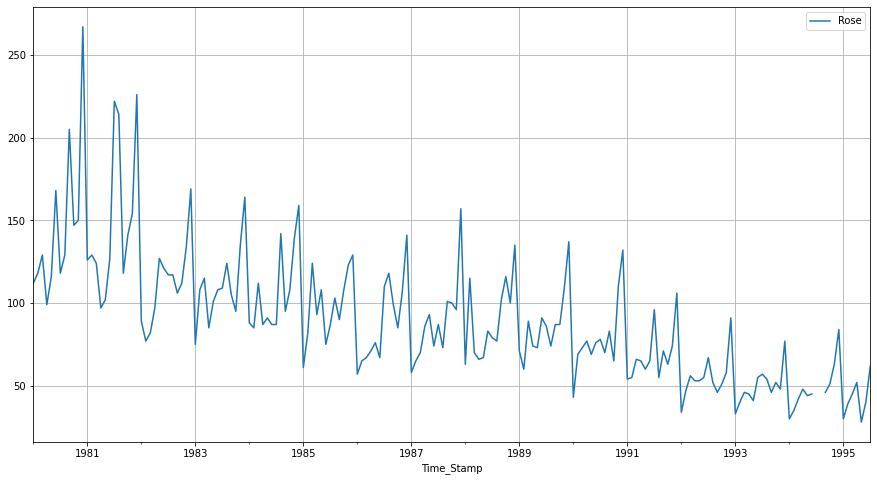

In [822]:
df.plot(grid=True);

## Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.



In [823]:
print("Basic Descriptive Stats of Time series ")

round(df.describe(),3)


Basic Descriptive Stats of Time series 


,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [824]:
## It has misisng data

In [825]:
df.isnull().sum()

Rose    2
dtype: int64

In [826]:
df[df.isnull().any(axis=1)]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [827]:
mask = (df.index > '1994-04-30') & (df.index <= '1994-10-31')

In [828]:
print(df.loc[mask])

            Rose
Time_Stamp      
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0


In [829]:
df=df.interpolate(method ='linear')

In [830]:
print(df.loc[mask])

                 Rose
Time_Stamp           
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  45.333333
1994-08-31  45.666667
1994-09-30  46.000000
1994-10-31  51.000000


In [831]:
print("count of missing null values" )
df.isnull().sum()

count of missing null values


Rose    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1e48dd86cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e48dd865b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e48dd86af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e4923368e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e491b61dc0>],
 'means': []}

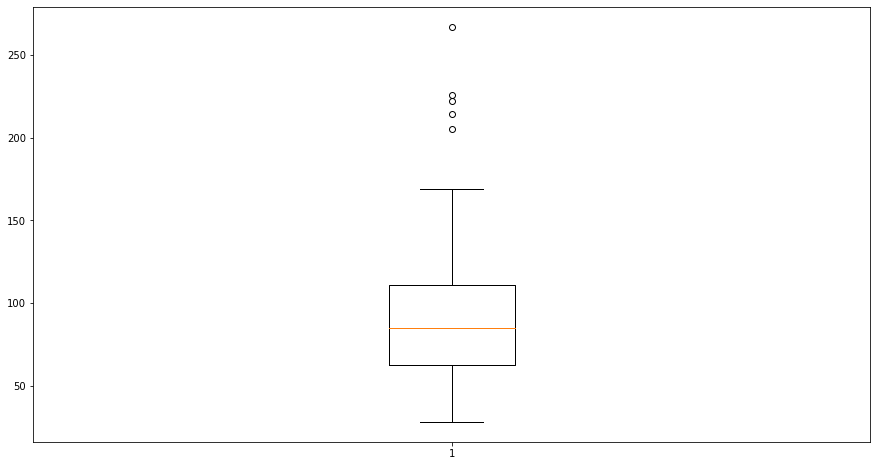

In [832]:
plt.boxplot(df)

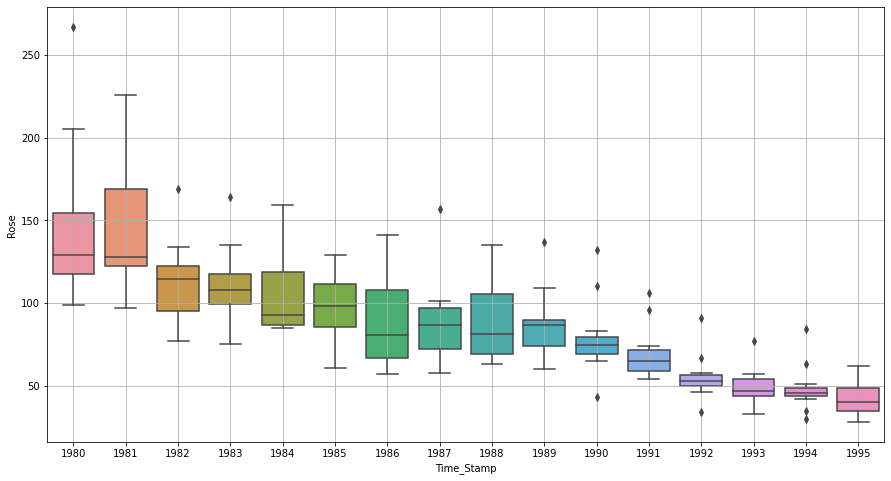

In [833]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

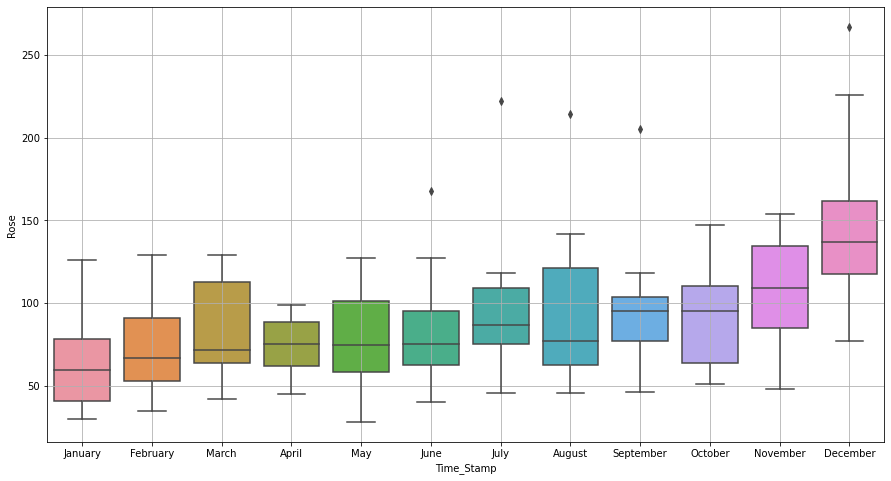

In [834]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

### Additive Decomposition

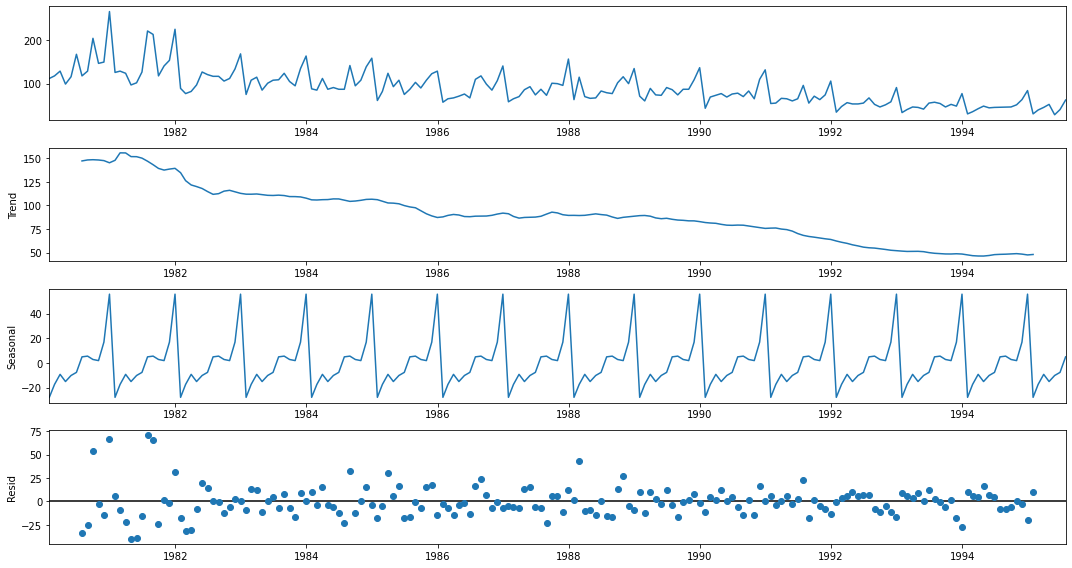

In [835]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [836]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [837]:
### Multiplicative Decomposition

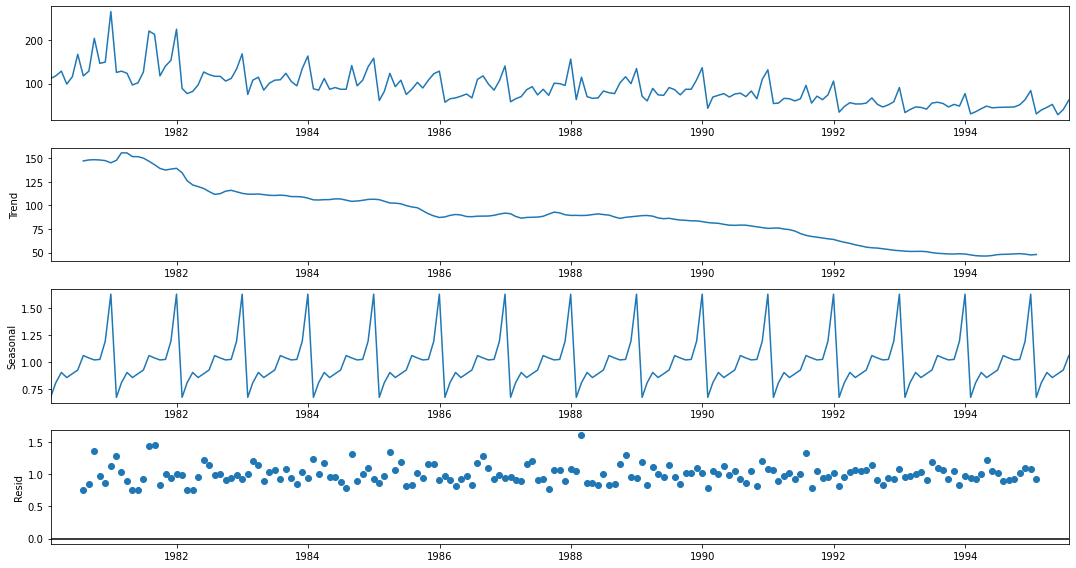

In [838]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [839]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901164
1980-04-30    0.854024
1980-05-31    0.889415
1980-06-30    0.923985
1980-07-31    1.058038
1980-08-31    1.035881
1980-09-30    1.017648
1980-10-31    1.022573
1980-11-30    1.192349
1980-12-31    1.628646
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758258
1980-08-31    0.840720
1980-09-30    1.357674
1980-10-31    0.970771
1980-11-30    0.853378
1980-12-31    1.129646
Name: resid, dtype:

checking stationarity of whole data 

In [840]:
print("checking seasonlity on whole data ")
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) ")
else :
    print("fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) ")

checking seasonlity on whole data 
DF test statistic is -2.240
DF test p-value is 0.46713716277931483
Number of lags used 13
fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) 


In [841]:
print( "Tyring to make data  stationary")
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])
if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) ")
else :
    print("fail to reject null hypothesis . its not stationary (p value is > 0.05 (alpha)) ")

Tyring to make data  stationary
DF test statistic is -8.162
DF test p-value is 3.01597611582698e-11
Number of lags used 12
reject Null hypothesis  ie its stationary  (p value is < 0.05 (alpha)) 


Plotting data with differencing 


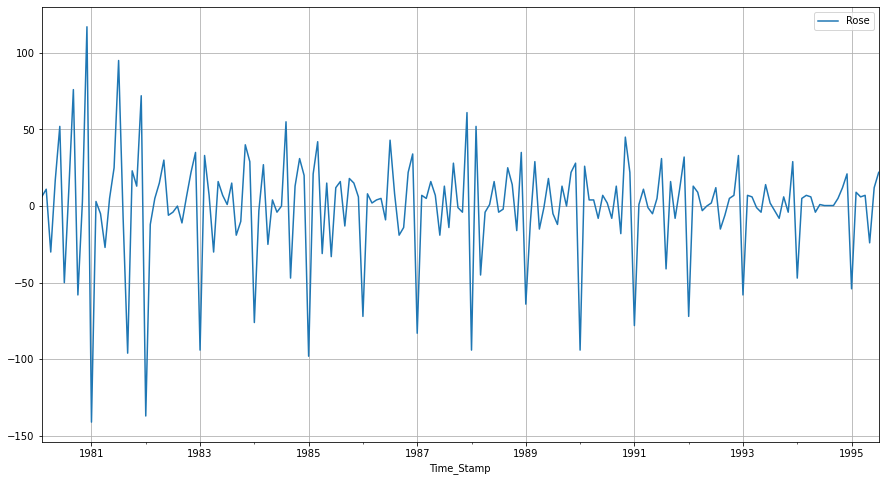

In [842]:
print("Plotting data with differencing ")
df.diff().dropna().plot(grid=True);

 Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

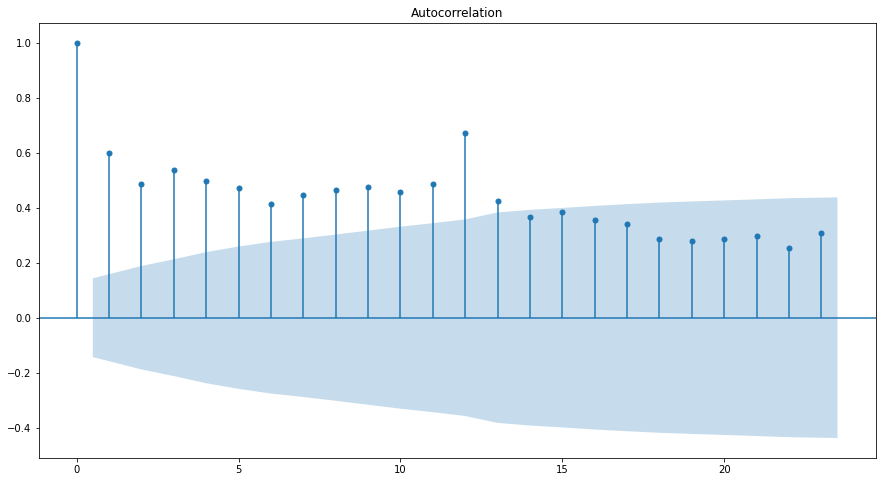

In [843]:
plot_acf(df,alpha=0.05);

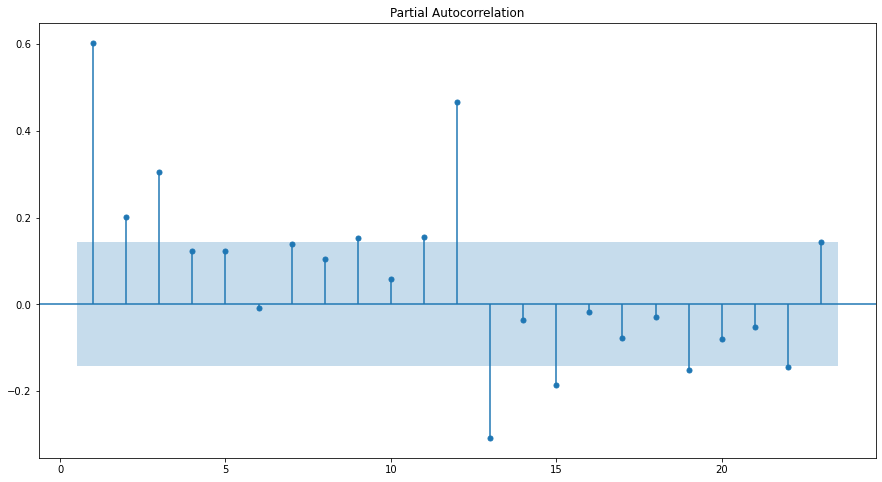

In [844]:
plot_pacf(df,zero=False,alpha=0.05);

## Split the data into training and test. The test data should start in 1991.

In [845]:
train             = df[df.index<'1991'] 
test              = df[df.index>='1991']

In [846]:
print("Head of train data ")
train.head()

Head of train data 


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [847]:
print("Tail of train data ")
train.tail()


Tail of train data 


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [848]:
print("Head of test data ")
test.head()

Head of test data 


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [849]:
print("Tail of test data ")
test.tail()


Tail of test data 


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


## Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Simple Exponential Smoothing with additive errors

In [850]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [851]:
model_SES_autofit = model_SES.fit(optimized=True)

In [852]:
model_SES_autofit.params

{'smoothing_level': 0.09874920899865502,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3871074301239,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [853]:
SES_predict = model_SES_autofit.forecast(steps=len(test))


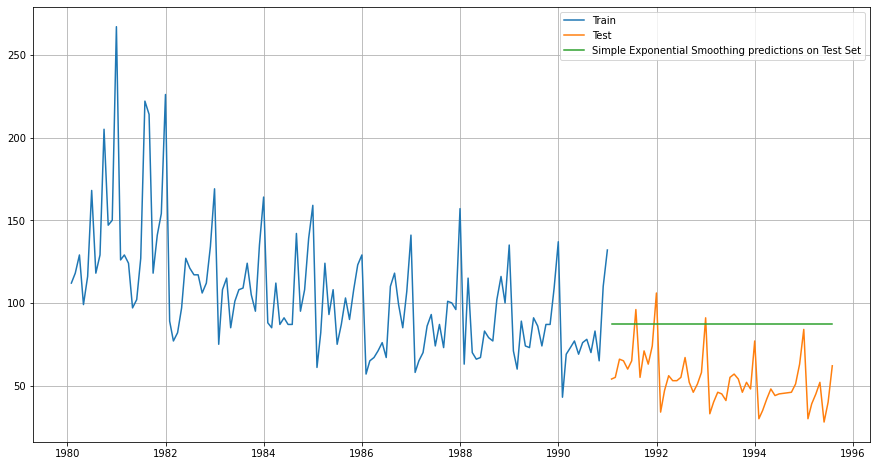

In [854]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()


In [855]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 36.79622482462249


In [856]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

,Test RMSE
SES,36.796225


## Double Exponential Smoothing - Holt's linear method with additive errors

In [857]:
model_DES = Holt(train,initialization_method='estimated')

model_DES = model_DES.fit()


D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [858]:
model_DES.params

{'smoothing_level': 1.4901161193847656e-08,
 'smoothing_trend': 5.448169774560283e-09,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 137.81762949544608,
 'initial_trend': -0.4943507283995123,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [859]:
DES_predict =  model_DES.forecast(len(test))

Text(0.5, 1.0, 'Double Exponential Smoothing Predictions')

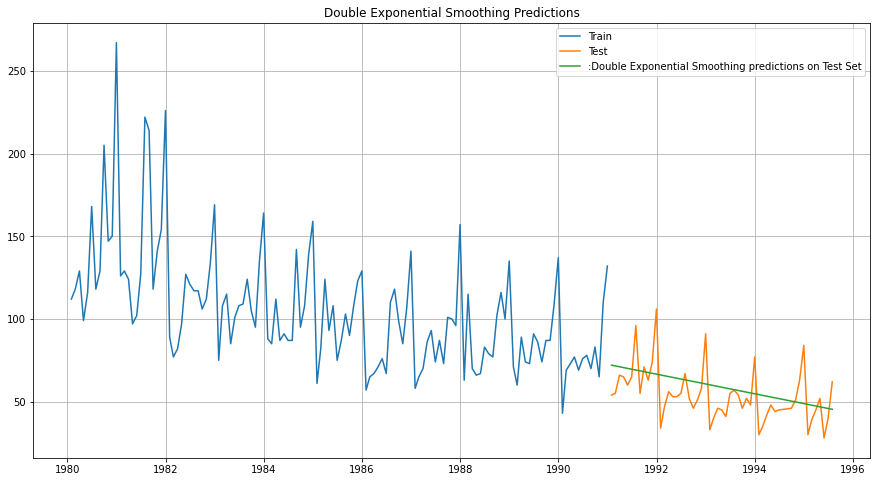

In [860]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(DES_predict, label=':Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions')

In [861]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.27096843395306


In [862]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968


### Triple  Exponential Smoothing (addictive) - Holt Winter's linear method with additive errors

In [863]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()
(model_TES.params)

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.08491574907842013,
 'smoothing_trend': 5.5205494088745035e-06,
 'smoothing_seasonal': 0.0005477182208247348,
 'damping_trend': nan,
 'initial_level': 147.05898703809248,
 'initial_trend': -0.5496981430927392,
 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
        -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
          4.83969803,   2.95125217,  21.07934859,  63.31472515]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [864]:
TES_predict =  model_TES.forecast(len(test))

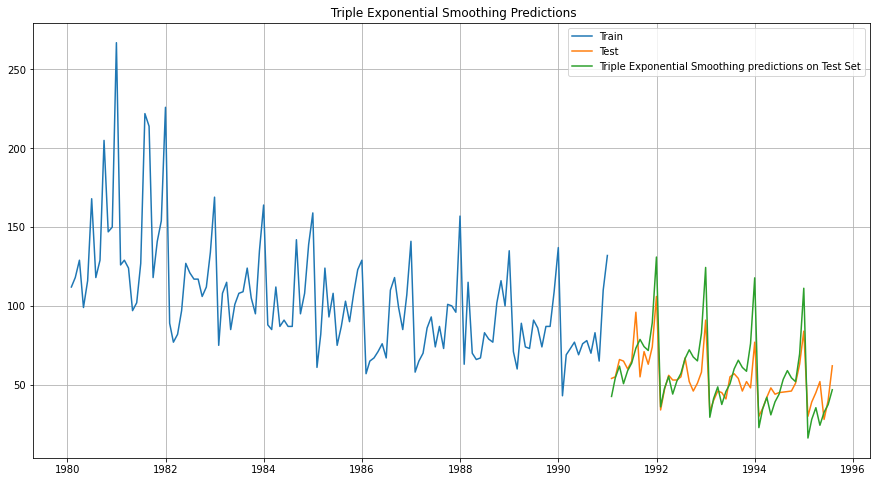

In [865]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title(' Triple Exponential Smoothing Predictions');

In [866]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.24323950074202


In [867]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES A'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968
TES A,14.243240


###  Triple  Exponential Smoothing ( Seasonal Multiplicative)  - Holt Winter's linear method 

In [868]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
model_TES_am = model_TES_am.fit()

model_TES_am.params

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [869]:
TES_predict_am =  model_TES_am.forecast(len(test))

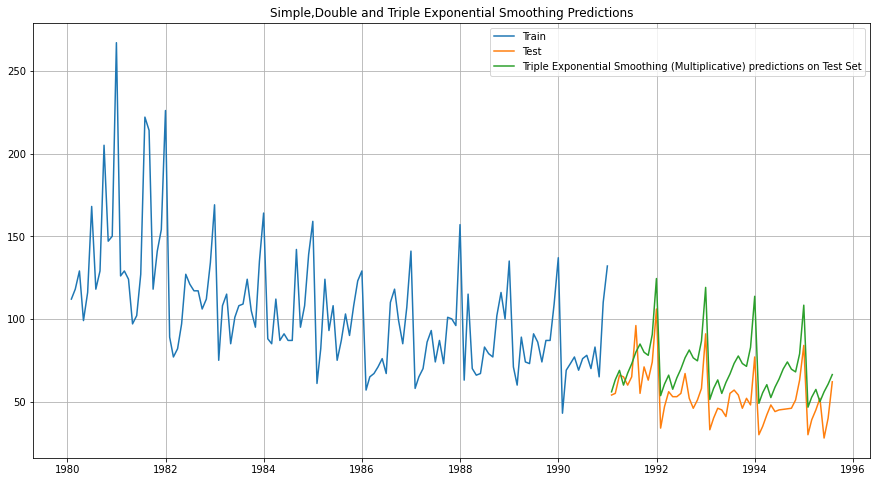

In [870]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')


plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative) predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [871]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 19.113110215160134


In [872]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES SM'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968
TES A,14.243240
TES SM,19.113110


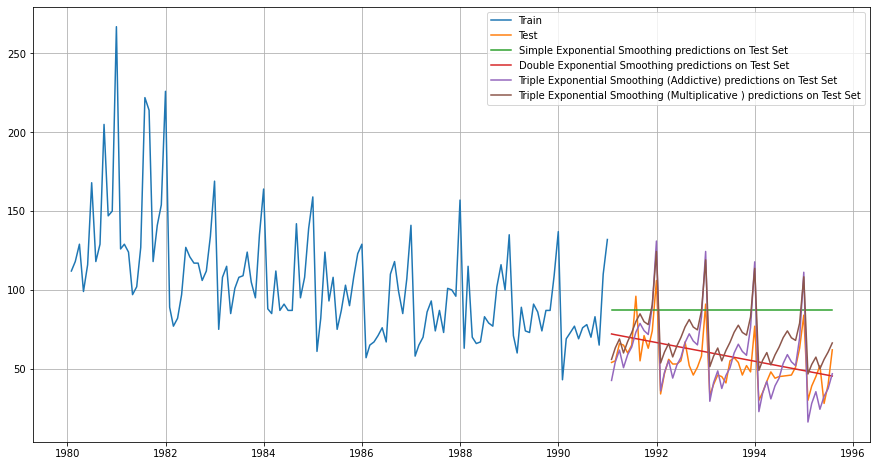

In [873]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative ) predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Linear Regression

In [874]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [875]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [876]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [877]:
LinearRegression_train.head()

,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


In [878]:
lr = LinearRegression()

In [879]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

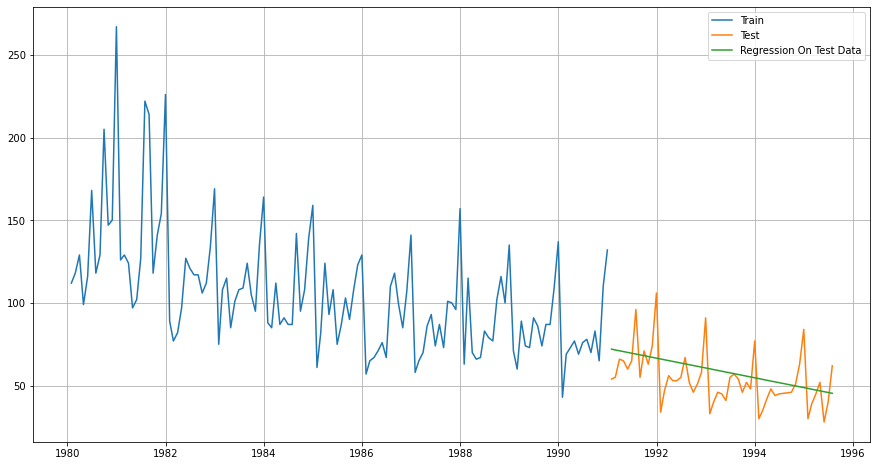

In [880]:
train_predictions_lr  = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['Regression'] = train_predictions_lr

test_predictions_lr   = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['Regression'] = test_predictions_lr

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')


plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')


plt.legend(loc='best')
plt.grid();

In [881]:
rmse_lr_test = mean_squared_error(test['Rose'],test_predictions_lr,squared=False)
print("For Regression  forecast on the Test Data,  RMSE is %3.3f " %(rmse_lr_test))

For Regression  forecast on the Test Data,  RMSE is 15.269 


In [882]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['Regression'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])

In [883]:
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968
TES A,14.243240
TES SM,19.113110
Regression,15.268955


### Naive Approach

In [884]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [885]:
train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [886]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

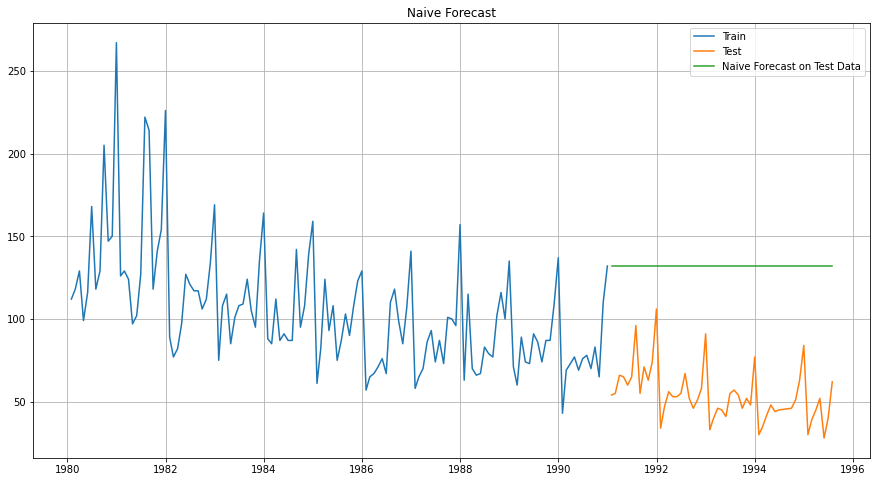

In [887]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [888]:
rmse_nm_test = mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive Forecast ,  RMSE is %3.3f" %(rmse_nm_test))

For Naive Forecast ,  RMSE is 79.719


In [889]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_nm_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968
TES A,14.243240
TES SM,19.113110
Regression,15.268955
NaiveModel,79.718773


### Simple Average

In [890]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [891]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


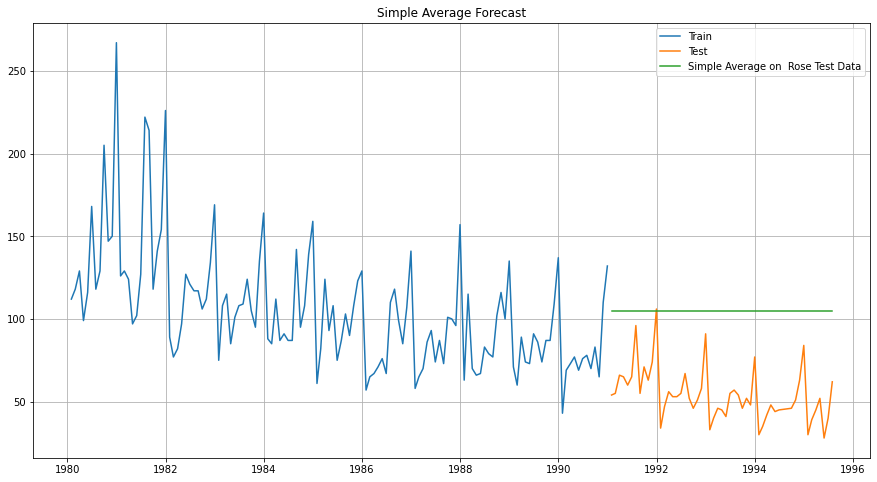

In [892]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Rose Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [893]:
rmse_sa_test = mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_sa_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [894]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_sa_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
SES,36.796225
DES,15.270968
TES A,14.243240
TES SM,19.113110
Regression,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


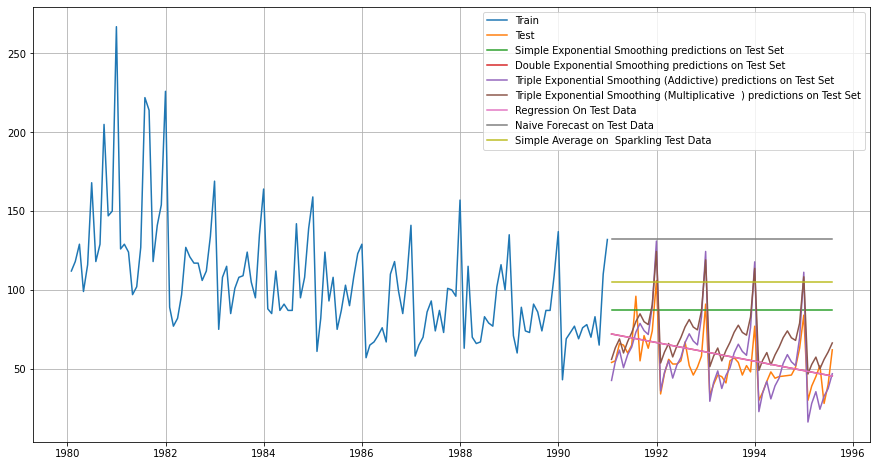

In [895]:

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative  ) predictions on Test Set')
plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Sparkling Test Data')



plt.legend(loc='best')
plt.grid();

 ## Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

checking stationarity of training data 

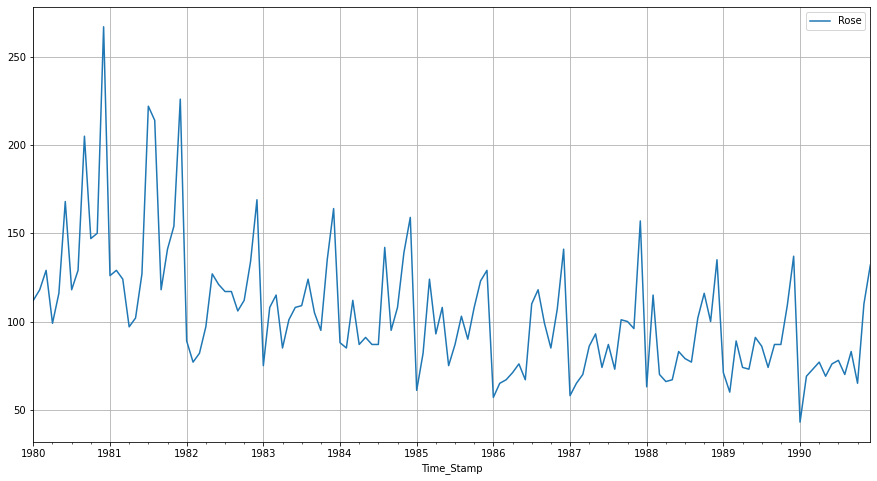

In [896]:
train.plot(grid=True);

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [897]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its statioary ")
else :
    print("fail to reject null hypoathes . its not stationary ")
    

DF test statistic is -1.686
DF test p-value is 0.7569093051047049
Number of lags used 13
fail to reject null hypoathes . its not stationary 


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [898]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

if dftest[1] < 0.05 :
    print ("reject Null hypothesis  ie its statioary ")
else :
    print("fail to reject null hypoathes . its not stationary ")
    

DF test statistic is -6.804
DF test p-value is 3.894831356783106e-08
Number of lags used 12
reject Null hypothesis  ie its statioary 


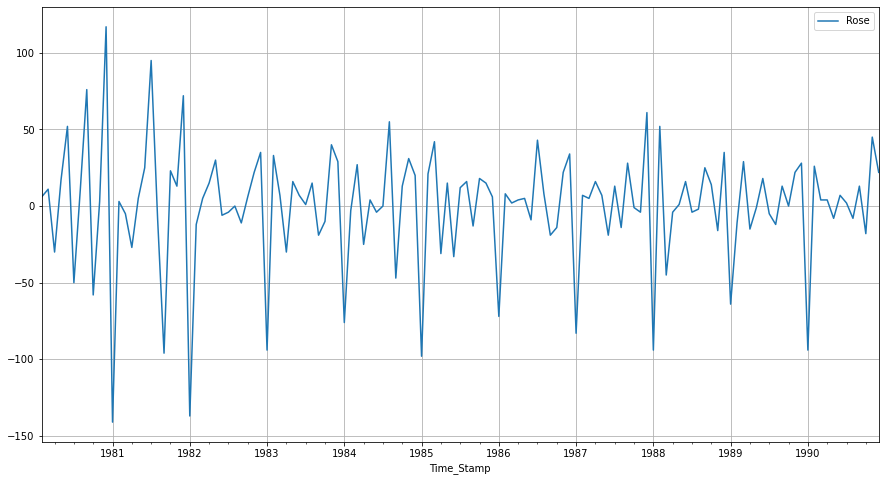

In [899]:
train.diff().dropna().plot(grid=True);

In [900]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


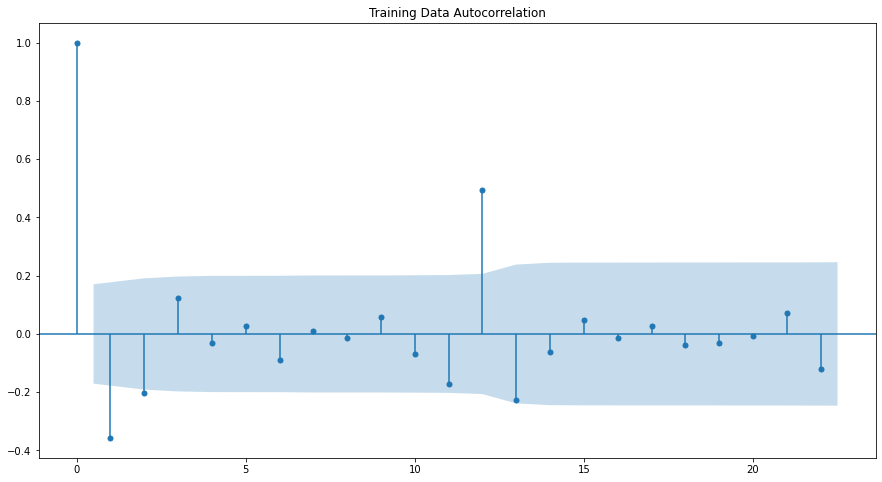

In [901]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

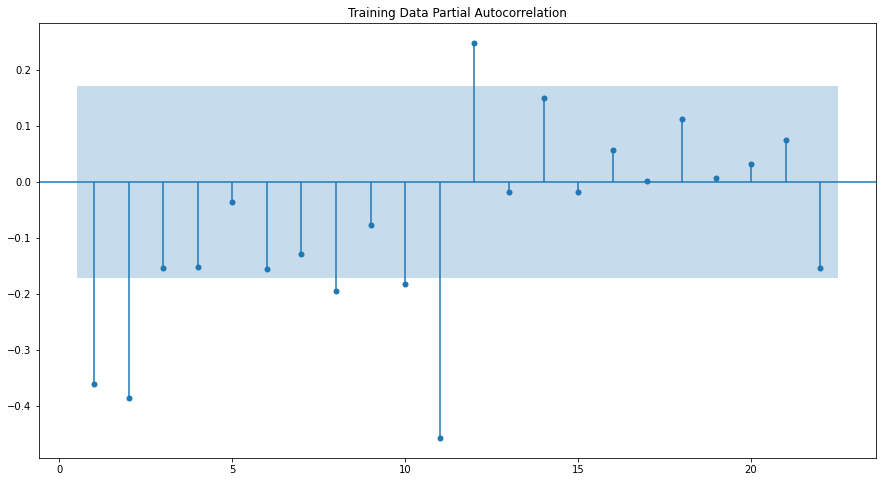

In [902]:
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False);

## Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

 Note: The data has some seasonality so ideally we should build a SARIMA model. But for reconformation I am  building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [903]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [904]:

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [905]:

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.154672912435
ARIMA(0, 1, 1) - AIC:1282.3098319748347
ARIMA(0, 1, 2) - AIC:1279.671528853577
ARIMA(0, 1, 3) - AIC:1280.5453761734668
ARIMA(1, 1, 0) - AIC:1317.350310538156
ARIMA(1, 1, 1) - AIC:1280.5742295380078
ARIMA(1, 1, 2) - AIC:1279.870723423192
ARIMA(1, 1, 3) - AIC:1281.8707223309964
ARIMA(2, 1, 0) - AIC:1298.6110341604892
ARIMA(2, 1, 1) - AIC:1281.5078621868524
ARIMA(2, 1, 2) - AIC:1281.870722226448


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6951715918117
ARIMA(3, 1, 0) - AIC:1297.4810917271716
ARIMA(3, 1, 1) - AIC:1282.4192776271911


D:\anocondal\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anocondal\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.7207405977156
ARIMA(3, 1, 3) - AIC:1278.6552365209318


D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [906]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.695172
15,"(3, 1, 3)",1278.655237
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [907]:
auto_ARIMA = ARIMA(train, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 23 May 2021   AIC                           1274.695
Time:                        18:31:33   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6780      0.084    -20.002      0.000      -1.842      -1.514
ar.L2         -0.7288      0.084     -8.687      0.000      -0.893      -0.564
ma.L1          1.0447      0.638      1.638      0.1

D:\anocondal\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagboistics Plot


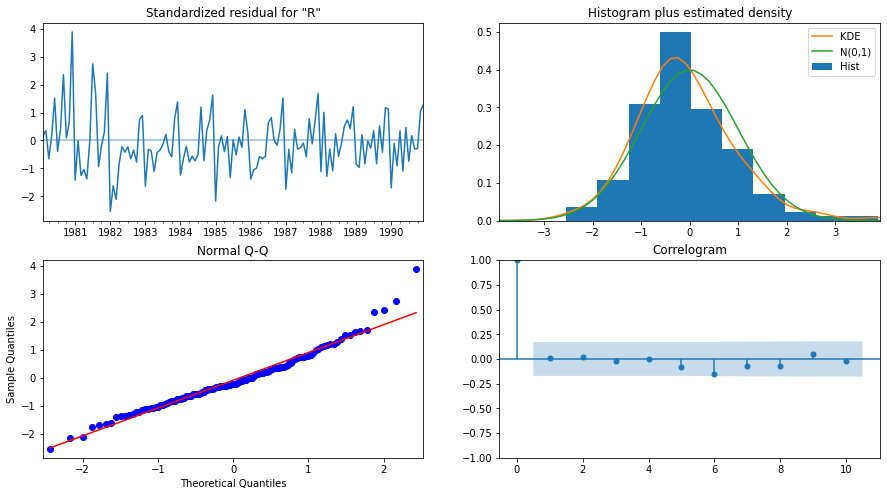

In [908]:
print("Diagboistics Plot")
results_auto_ARIMA.plot_diagnostics();

In [909]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [910]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.81375470121735


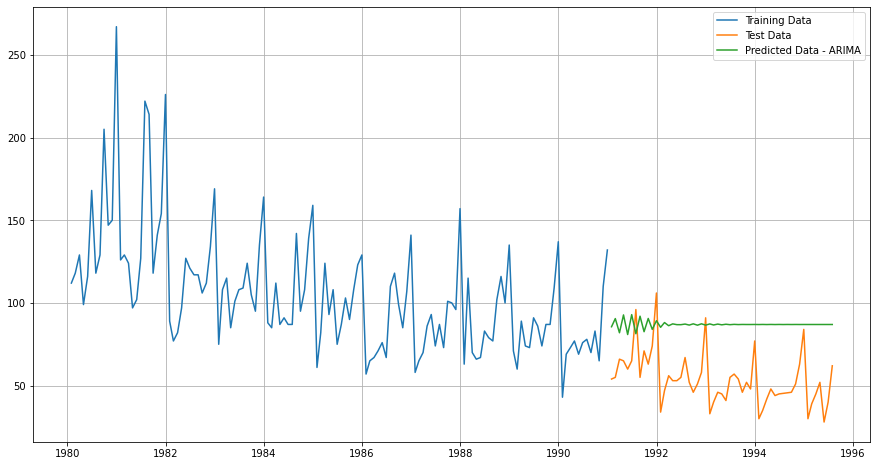

In [911]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [912]:
resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.813755


sarima

acf plot  of training data


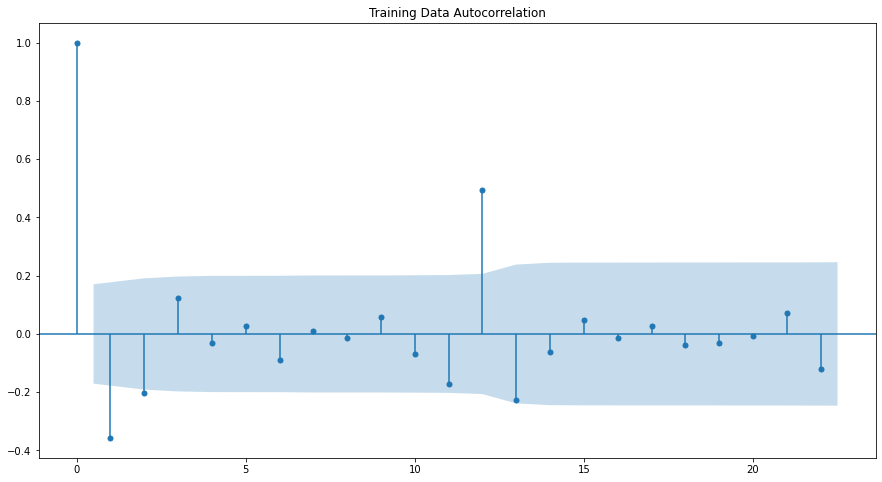

In [913]:
print("acf plot  of training data")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is no seasonality.

In [914]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [915]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [916]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827379
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625291
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149107
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721787
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.98617431244
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515267
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426127638
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.804820642388
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.5465834695267
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.3687765139675
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.0425053414538
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.8803339857695
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802955
SARIMA(0, 1, 1)x(0, 0, 2, 6) - A

In [917]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744297
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582110
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205627
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684953


In [918]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Sun, 23 May 2021   AIC                            951.744
Time:                                   18:33:30   BIC                            981.349
Sample:                               01-31-1980   HQIC                           963.750
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.081      0.000      -0.665      -0.341
ar.L2         -0.6628      0.084     -7.918

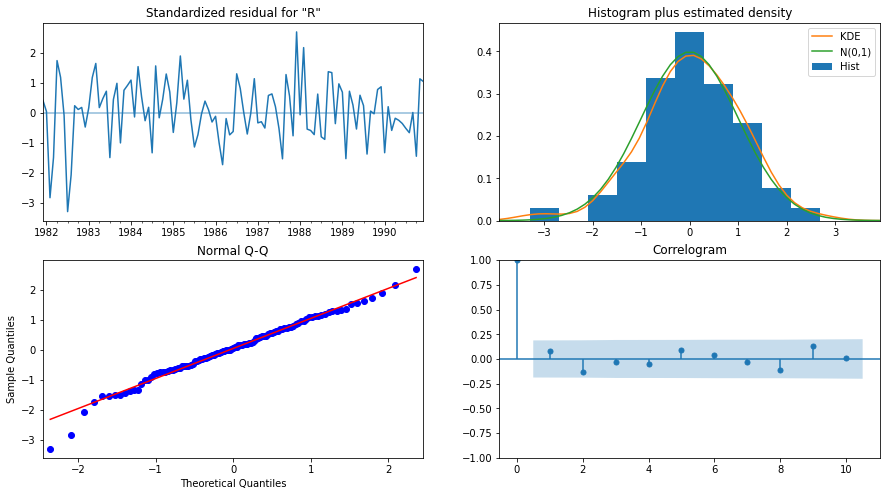

In [919]:
results_auto_SARIMA.plot_diagnostics();

In [920]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [921]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,66.900267,16.350805,34.853277,98.947256
1991-02-28,65.988243,16.482054,33.684010,98.292476
1991-03-31,74.438106,16.587979,41.926264,106.949948
1991-04-30,76.040601,16.710580,43.288467,108.792736
1991-05-31,78.414649,16.711193,45.661312,111.167986


In [922]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)

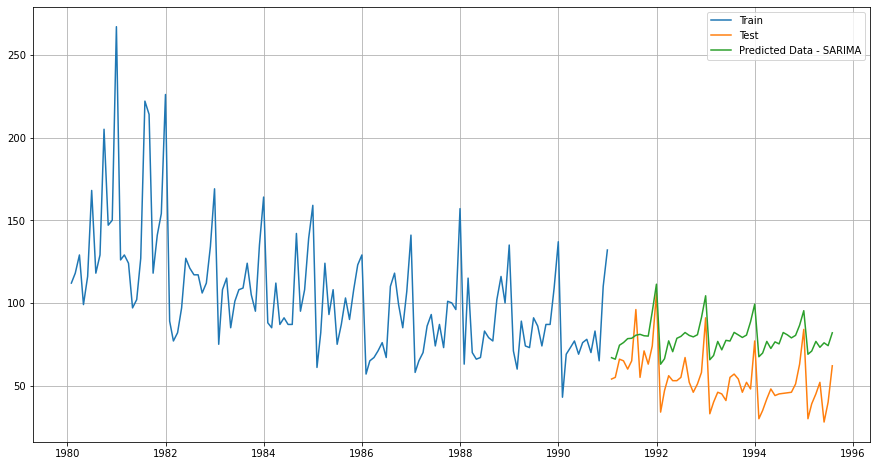

In [923]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')


plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

In [924]:
print('RMSE:',rmse)

RMSE: 27.124404049535265


In [925]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(2,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.813755
"SARIMA(2,1,3)(2,0,3,6)",27.124404


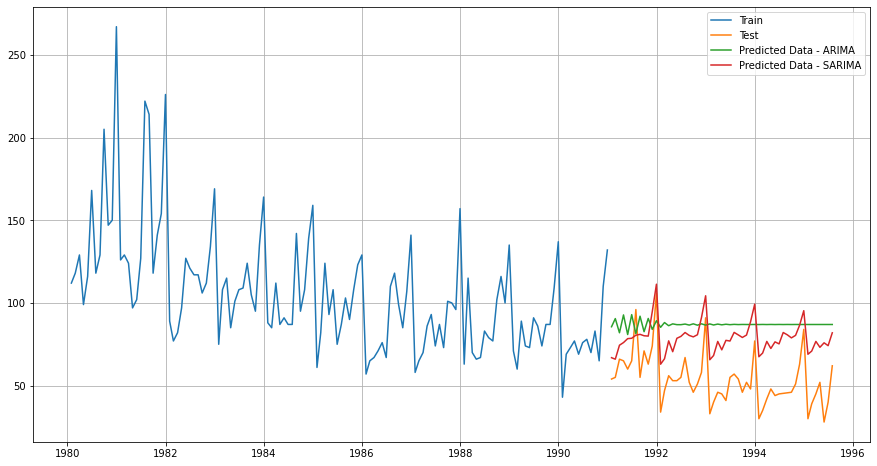

In [926]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

## Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Arima

 ACF and the PACF plots of training data 


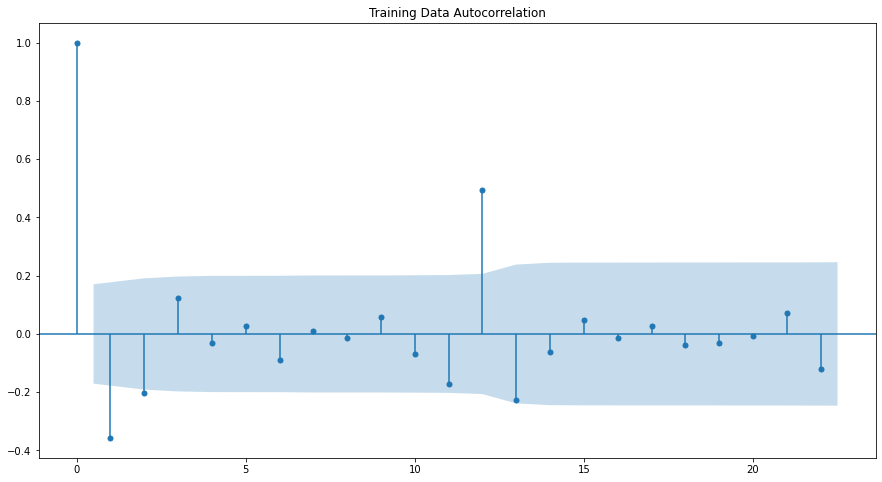

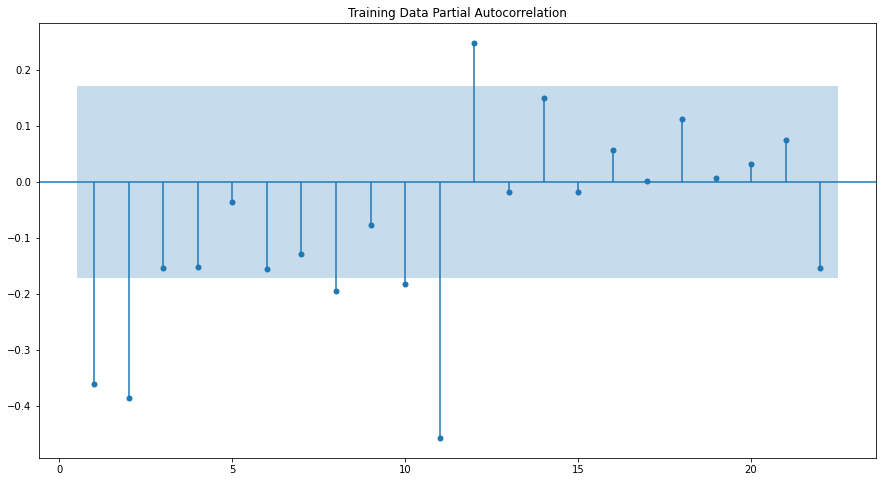

In [927]:
print(" ACF and the PACF plots of training data ")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False);

In [928]:
manual_ARIMA = ARIMA(train['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 May 2021   AIC                           1281.871
Time:                        18:33:31   BIC                           1296.247
Sample:                    01-31-1980   HQIC                          1287.712
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


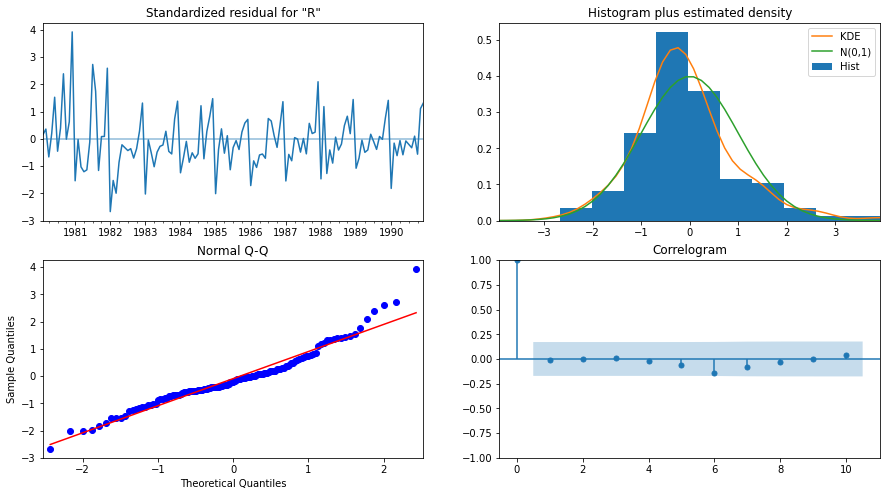

In [929]:
results_manual_ARIMA.plot_diagnostics();

In [930]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [931]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
rmsea=rmse
print('RMSE:',rmse)

RMSE: 36.87119661682952


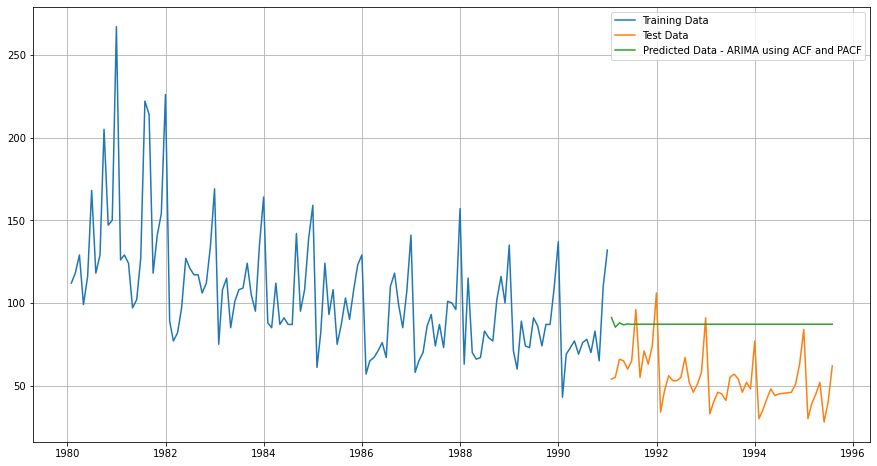

In [932]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.legend(loc='best')
plt.grid();

In [933]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse}
                           ,index=['ARIMA M(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,3)",36.813755
"SARIMA(2,1,3)(2,0,3,6)",27.124404
"ARIMA M(2,1,2)",36.871197


 ACF and the PACF plots of training data 


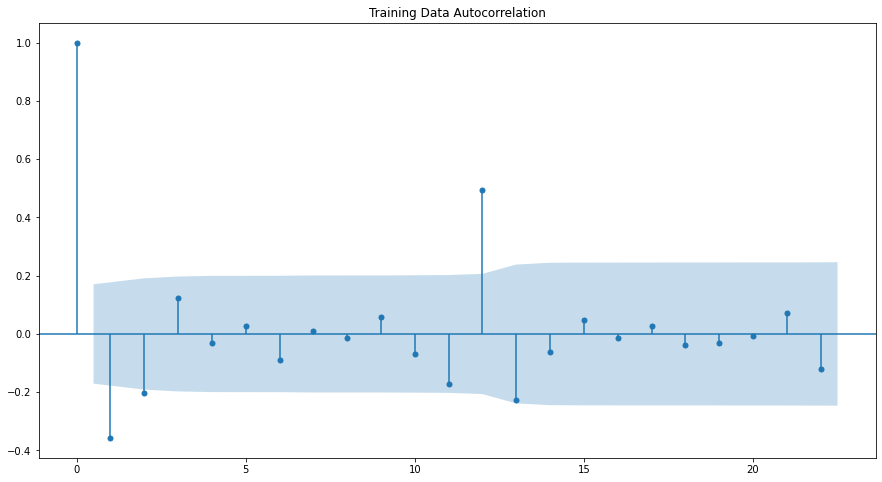

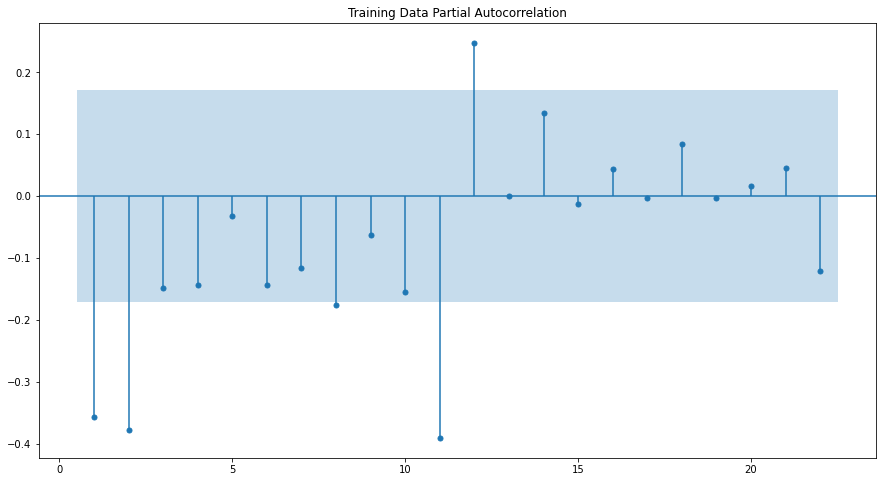

In [934]:
print(" ACF and the PACF plots of training data ")
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [935]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                         SARIMAX Results                                         
Dep. Variable:                                      Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 0, [1, 2, 3], 6)   Log Likelihood                -494.745
Date:                                   Sun, 23 May 2021   AIC                           1005.489
Time:                                           18:33:33   BIC                           1027.093
Sample:                                       01-31-1980   HQIC                          1014.252
                                            - 12-31-1990                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5896      0.081     -7.267      0.000    

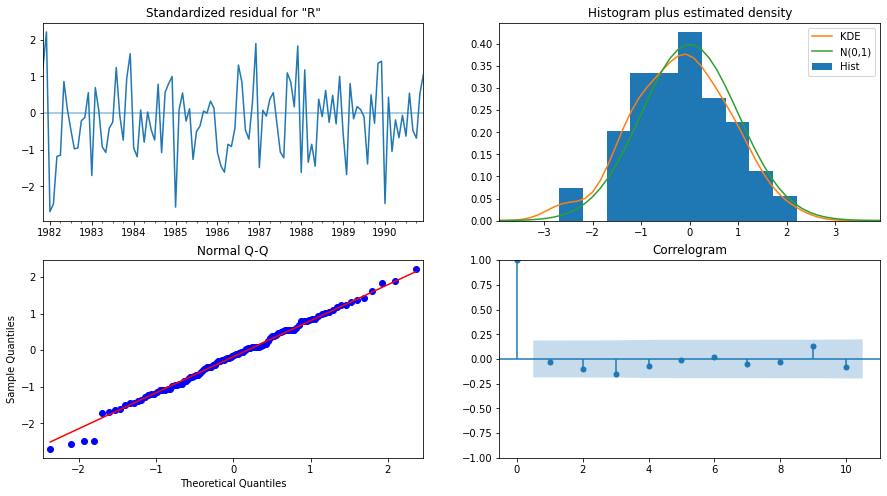

In [936]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [937]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [938]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 33.05392044028609


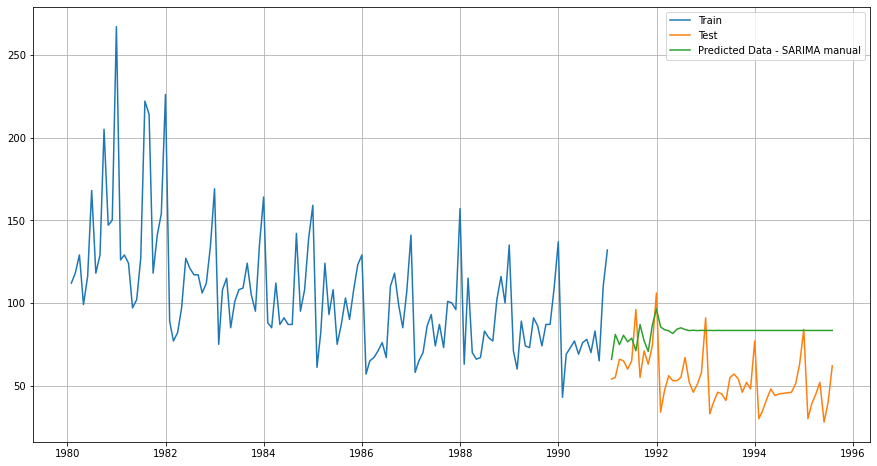

In [939]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')


plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual')

plt.legend(loc='best')
plt.grid();

In [940]:
temp_resultsDf = pd.DataFrame({'RMSE': rmsea}
                           ,index=['ARIMA M(2,1,2)'])

temp_resultsDf2 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA M(2,1,2)(0,0,3,6)'])

resultsDf1 = pd.concat([temp_resultsDf,temp_resultsDf2])
resultsDf1

,RMSE
"ARIMA M(2,1,2)",36.871197
"SARIMA M(2,1,2)(0,0,3,6)",33.053920


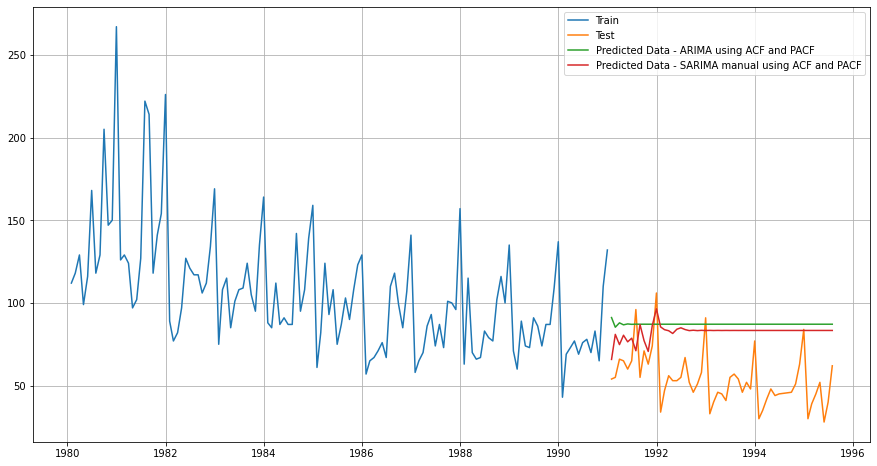

In [941]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual using ACF and PACF')

plt.legend(loc='best')
plt.grid();

In [942]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA M(2,1,2)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])


resultsDf

,RMSE
"ARIMA(2,1,3)",36.813755
"SARIMA(2,1,3)(2,0,3,6)",27.124404
"ARIMA M(2,1,2)",36.871197
"SARIMA M(2,1,2)(0,0,3,6)",33.053920


## Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [949]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [950]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]],'MAPE':MAPE(test.values,SES_predict.values) },index=['SES (Alpha=0.0987)'])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183


In [951]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)],'MAPE':MAPE(test.values,DES_predict.values)}
                           ,index=['DES (Alpha=1.4901e-08,Beta=5.4481e-09)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896


In [952]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)],'MAPE':MAPE(test.values,TES_predict.values)}
                           ,index=['TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275


In [953]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)],'MAPE':MAPE(test.values,TES_predict_am.values)}
                           ,index=['TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101


In [954]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],test_predictions_lr,squared=False)],'MAPE':MAPE(test.values,test_predictions_lr)},
                              index=['Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644


In [955]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)],'MAPE':MAPE(test.values,NaiveModel_test['naive'].values)},
                              index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf



,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275


In [956]:

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)],'MAPE':MAPE(test.values,SimpleAverage_test['mean_forecast'].values)},
                              index=['SimpleAverage '])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf


,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275
SimpleAverage,53.460570,110.587957


In [957]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)],'MAPE':MAPE(test['Rose'],predicted_auto_ARIMA)},
                              index=['Arima (2,1,3) : Low AIC'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275
SimpleAverage,53.460570,110.587957
"Arima (2,1,3) : Low AIC",36.813755,75.840581


In [958]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)],'MAPE':MAPE(test['Rose'],predicted_auto_SARIMA.predicted_mean)},
                              index=['Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275
SimpleAverage,53.460570,110.587957
"Arima (2,1,3) : Low AIC",36.813755,75.840581
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",27.124404,55.239519


In [959]:

resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)],'MAPE':MAPE(test['Rose'],predicted_manual_ARIMA)},
                              index=['Arima (2,1,2) : cut-off points of ACF and PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275
SimpleAverage,53.460570,110.587957
"Arima (2,1,3) : Low AIC",36.813755,75.840581
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",27.124404,55.239519
"Arima (2,1,2) : cut-off points of ACF and PACF",36.871197,76.056213


In [960]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)],'MAPE':MAPE(test['Rose'],predicted_manual_SARIMA.predicted_mean)},
                              index=['Sarima (2, 1, 2)(0, 0, 3,6), :cut-off points of ACF and PACF'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE,MAPE
SES (Alpha=0.0987),36.796225,75.909183
"DES (Alpha=1.4901e-08,Beta=5.4481e-09)",15.270968,30.073896
"TES (Alpha=0.0849,Beta=5.52e-06,Gamma=0.0005) : Addictive",14.243240,42.850275
"TES(Alpha=0.0773,Beta=0.0393,Gamma=0.0008): Multiplicative",19.113110,47.756101
Regression,15.268955,30.067644
NaiveModel,79.718773,164.846275
SimpleAverage,53.460570,110.587957
"Arima (2,1,3) : Low AIC",36.813755,75.840581
"Sarima (2, 1, 3)(2, 0, 3,6), :Low AIC",27.124404,55.239519
"Arima (2,1,2) : cut-off points of ACF and PACF",36.871197,76.056213


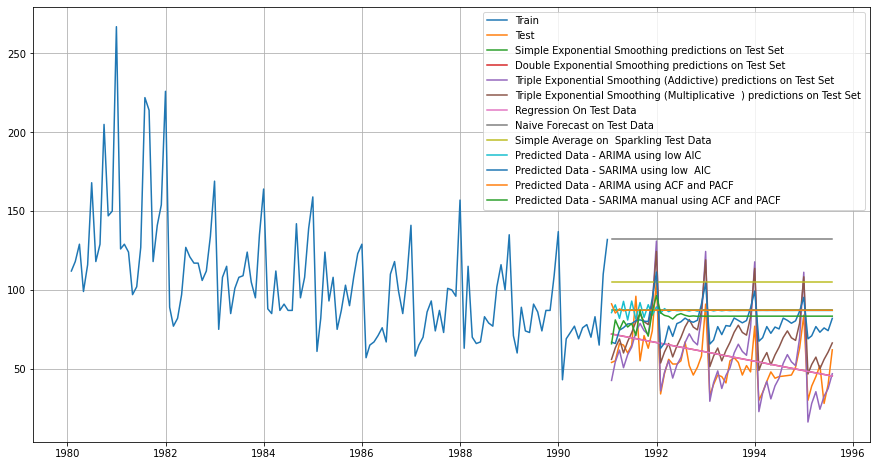

In [961]:
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing (Addictive) predictions on Test Set')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing (Multiplicative  ) predictions on Test Set')
plt.plot(LinearRegression_test['Regression'], label='Regression On Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on  Sparkling Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - ARIMA using low AIC  ')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA using low  AIC ')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - ARIMA using ACF and PACF')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA manual using ACF and PACF')



plt.legend(loc='best')
plt.grid();

## Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [805]:
print(model_TES.params)

{'smoothing_level': 0.08491574907842013, 'smoothing_trend': 5.5205494088745035e-06, 'smoothing_seasonal': 0.0005477182208247348, 'damping_trend': nan, 'initial_level': 147.05898703809248, 'initial_trend': -0.5496981430927392, 'initial_seasons': array([-31.16021285, -18.81317648, -10.81406896, -21.41413199,
       -12.6036696 ,  -7.23553106,   2.76744902,   8.85548059,
         4.83969803,   2.95125217,  21.07934859,  63.31472515]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [806]:
Fulldata_TES_model = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')
Fulldata_TES_model = Fulldata_TES_model.fit(smoothing_level= 0.08491574907842013, smoothing_trend=5.5205494088745035e-06, smoothing_seasonal=0.0005477182208247348)
print(Fulldata_TES_model.params)

{'smoothing_level': 0.08491574907842013, 'smoothing_trend': 5.5205494088745035e-06, 'smoothing_seasonal': 0.0005477182208247348, 'damping_trend': nan, 'initial_level': 145.99878971721054, 'initial_trend': -0.5425658176427087, 'initial_seasons': array([-28.03982691, -17.18681335,  -9.08385981, -15.73281059,
       -11.81874916,  -5.77678009,   5.41131473,   5.30847153,
         2.67615901,   1.95276643,  17.09596379,  55.90979634]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\anocondal\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [807]:
Fulldata_TES_model.summary()

Dep. Variable:,Rose,No. Observations:,187
Model:,ExponentialSmoothing,SSE,58378.195
Optimized:,True,AIC,1106.051
Trend:,Additive,BIC,1157.749
Seasonal:,Additive,AICC,1110.123
Seasonal Periods:,12,Date:,"Sun, 23 May 2021"
Box-Cox:,False,Time:,18:21:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0849157,alpha,False
smoothing_trend,5.5205e-06,beta,False


In [808]:
Predicted12months =  Fulldata_TES_model.forecast(steps=12)

In [809]:
Predicted12months

1995-08-31    49.304696
1995-09-30    46.129961
1995-10-31    44.864079
1995-11-30    59.464640
1995-12-31    97.735616
1996-01-31    13.243890
1996-02-29    23.554355
1996-03-31    31.114713
1996-04-30    23.923410
1996-05-31    27.294667
1996-06-30    32.794011
1996-07-31    43.432328
Freq: M, dtype: float64

In [810]:
rmse = mean_squared_error(df['Rose'],Fulldata_TES_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 17.668697255044485


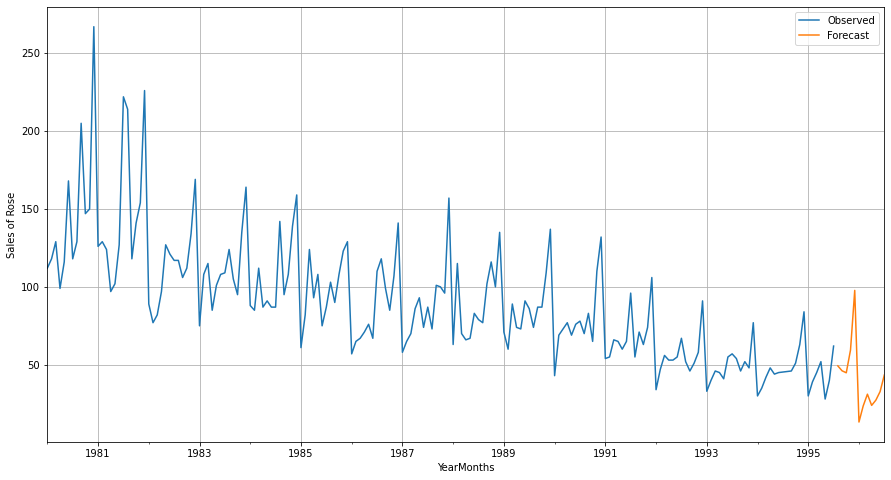

In [811]:
axis = df['Rose'].plot(label='Observed')

Predicted12months.plot(ax=axis, label='Forecast')

axis.set_xlabel('YearMonths')
axis.set_ylabel('Sales of Rose')
plt.legend(loc='best')
plt.grid();

In [963]:
Predicted12months.describe()

count    12.000000
mean     41.071364
std      22.146617
min      13.243890
25%      26.451853
50%      38.113170
75%      46.923645
max      97.735616
dtype: float64

In [812]:
##Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

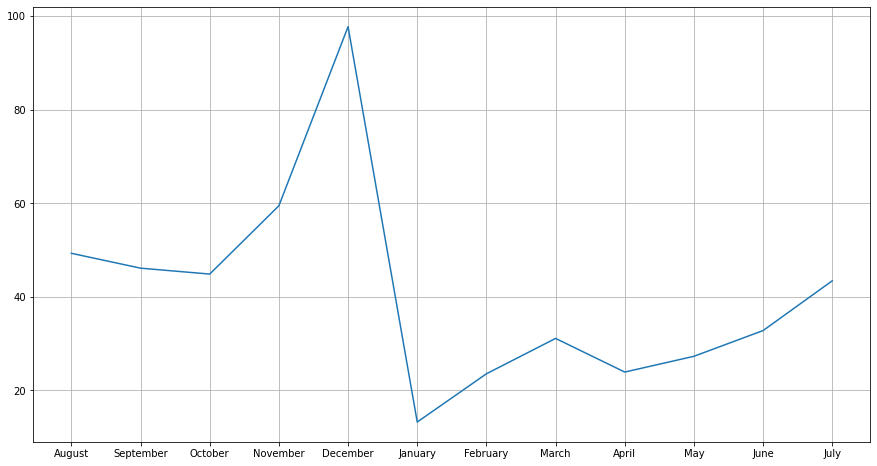

In [962]:
sns.lineplot(x = Predicted12months.index.month_name(),y = Predicted12months)
plt.grid();